In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import math

In [3]:
def Compute_GX_GY(image):
    
    edge_filter = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]) #defining sobel filter
    new_image_x, new_image_y = np.zeros_like(image, dtype=float), np.zeros_like(image, dtype=float)
    #defining 2 arrays of size image filled with zeroes
    
    for i in range(image.shape[0]-2):
        for j in range(image.shape[1]-2):
            window = image[i:i+3, j:j+3] 
            new_image_x[i,j], new_image_y[i,j] = np.sum(window * edge_filter.T), np.sum(window * edge_filter)
            #applying sobel filter of 3*3 size on image_x and transpose of it on image_y
            
    gradient_magnitude = np.sqrt(np.square(new_image_x) + np.square(new_image_y)) #no need for absolute as squaring and then taking a square root
    gradient_magnitude *= 255.0 / gradient_magnitude.max() #normalizing magnitude
    
    plt.imshow(gradient_magnitude, cmap='gray')
    plt.title("Gradient Magnitude") #plotting gradient magnitude
    plt.show()
    gradient_direction = (np.arctan2(new_image_y, new_image_x)* 180 / np.pi)  #calculating gradient angles in degrees
    gradient_direction=gradient_direction+360
    gradient_direction=np.fmod(gradient_direction,360)
    return gradient_magnitude, gradient_direction# Function for computing Gradient Angle


In [4]:
#make angle between 0-180
def Compute_scaled_angle(Angle):
    IMAGE_N,IMAGE_M=Angle.shape
    Scaled_angle=np.zeros((IMAGE_N,IMAGE_M),dtype=np.float)
    for i in range(0,IMAGE_N):
        for j in range(0,IMAGE_M):
            if(Angle[i][j]>=170 and Angle[i][j]<350):
                Scaled_angle[i][j]=Angle[i][j]-180
            elif(Angle[i][j]>=350 and Angle[i][j]<360):
                Scaled_angle[i][j]=Angle[i][j]-360
            else:
                Scaled_angle[i][j]=Angle[i][j]
    
    return Scaled_angle

In [5]:
# 8*8 Cell  and 16 * 16 pixel block! we move a cell for new block
def Compute_Histogram1(NORMALIZED_MAGNITUDE,Scaled_Angle):
    I_n,I_m=NORMALIZED_MAGNITUDE.shape
    start_n=0
    start_m=0
    Block_move_size=8
    i=0
    j=0
    Descriptor=[]
    while(i+16<=I_n):
        j=0
        while(j+16<=I_m):
            Block=[]
            Num_cell=0
            Cell_i=i
            Cell_j=j
            for Num_cell in range(4):
                Histogram_for_cell=np.zeros((9,1),dtype=np.float)
                
                for i1 in range(Cell_i,Cell_i+8):
                    for j1 in range(Cell_j,Cell_j+8):
                        #print(i,j,i1,j1,Cell_i,Cell_j)
                        if(Scaled_Angle[i1][j1]==0):
                            #do
                            Histogram_for_cell[0][0]+=NORMALIZED_MAGNITUDE[i1][j1]
                        elif(Scaled_Angle[i1][j1]==20):
                            #do
                            Histogram_for_cell[1][0]+=NORMALIZED_MAGNITUDE[i1][j1]
                        elif(Scaled_Angle[i1][j1]==40):
                            #do
                            Histogram_for_cell[2][0]+=NORMALIZED_MAGNITUDE[i1][j1]
                        elif(Scaled_Angle[i1][j1]==60):
                            #do
                            Histogram_for_cell[3][0]+=NORMALIZED_MAGNITUDE[i1][j1]
                        elif(Scaled_Angle[i1][j1]==80):
                            #do
                            Histogram_for_cell[4][0]+=NORMALIZED_MAGNITUDE[i1][j1]
                        elif(Scaled_Angle[i1][j1]==100):
                            #do
                            Histogram_for_cell[5][0]+=NORMALIZED_MAGNITUDE[i1][j1]
                        elif(Scaled_Angle[i1][j1]==120):
                            #do
                            Histogram_for_cell[6][0]+=NORMALIZED_MAGNITUDE[i1][j1]
                        elif(Scaled_Angle[i1][j1]==140):
                            #do
                            Histogram_for_cell[7][0]+=NORMALIZED_MAGNITUDE[i1][j1]
                        elif(Scaled_Angle[i1][j1]==160):
                            #do
                            Histogram_for_cell[8][0]+=NORMALIZED_MAGNITUDE[i1][j1]
                        else:
                            c1=-111
                            c2=-111
                            if(Scaled_Angle[i1][j1]>=-10 and Scaled_Angle[i1][j1]<0):
                                dis=0-Scaled_Angle[i1][j]
                                Factor_c1=(20-(np.abs(0+Scaled_Angle[i1][j1])))/20
                                Factor_c2=(20-(np.abs(20+Scaled_Angle[i1][j1])))/20
                                
                                Histogram_for_cell[0][0]+=(NORMALIZED_MAGNITUDE[i1][j1]*Factor_c1)
                                Histogram_for_cell[8][0]+=(NORMALIZED_MAGNITUDE[i1][j1]*Factor_c2)
                            if(Scaled_Angle[i1][j1]>0 and Scaled_Angle[i1][j1]<20):
                                # do for center 0 and 20
                                c1=0
                                c2=1
                                Factor_c1=(20-(np.abs(Scaled_Angle[i1][j1]-0)))/20
                                Factor_c2=(20-(np.abs(Scaled_Angle[i1][j1]-20)))/20
                                
                                Histogram_for_cell[0][0]+=(NORMALIZED_MAGNITUDE[i1][j1]*Factor_c1)
                                Histogram_for_cell[1][0]+=(NORMALIZED_MAGNITUDE[i1][j1]*Factor_c2)
                            elif(Scaled_Angle[i1][j1]>20 and Scaled_Angle[i1][j1]<40):
                                #do for center 20 and 40
                                c1=1
                                c2=2
                                Factor_c1=(20-(np.abs(Scaled_Angle[i1][j1]-20)))/20
                                Factor_c2=(20-(np.abs(Scaled_Angle[i1][j1]-40)))/20
                                
                                Histogram_for_cell[1][0]+=(NORMALIZED_MAGNITUDE[i1][j1]*Factor_c1)
                                Histogram_for_cell[2][0]+=(NORMALIZED_MAGNITUDE[i1][j1]*Factor_c2)
                                
                            elif(Scaled_Angle[i1][j1]>40 and Scaled_Angle[i1][j1]<60):
                                #do for center 40 and 60
                                c1=2
                                c2=3
                                Factor_c1=(20-(np.abs(Scaled_Angle[i1][j1]-40)))/20
                                Factor_c2=(20-(np.abs(Scaled_Angle[i1][j1]-60)))/20
                                
                                Histogram_for_cell[2][0]+=(NORMALIZED_MAGNITUDE[i1][j1]*Factor_c1)
                                Histogram_for_cell[3][0]+=(NORMALIZED_MAGNITUDE[i1][j1]*Factor_c2)
                            elif(Scaled_Angle[i1][j1]>60 and Scaled_Angle[i1][j1]<80):
                                #do for center 60 and 80
                                c1=3
                                c2=4
                                Factor_c1=(20-(np.abs(Scaled_Angle[i1][j1]-60)))/20
                                Factor_c2=(20-(np.abs(Scaled_Angle[i1][j1]-80)))/20
                                
                                Histogram_for_cell[3][0]+=(NORMALIZED_MAGNITUDE[i1][j1]*Factor_c1)
                                Histogram_for_cell[4][0]+=(NORMALIZED_MAGNITUDE[i1][j1]*Factor_c2)
                            elif(Scaled_Angle[i1][j1]>80 and Scaled_Angle[i1][j1]<100):
                                #do for center 80 and 100
                                c1=4
                                c2=5
                                Factor_c1=(20-(np.abs(Scaled_Angle[i1][j1]-80)))/20
                                Factor_c2=(20-(np.abs(Scaled_Angle[i1][j1]-100)))/20
                                
                                Histogram_for_cell[4][0]+=(NORMALIZED_MAGNITUDE[i1][j1]*Factor_c1)
                                Histogram_for_cell[5][0]+=(NORMALIZED_MAGNITUDE[i1][j1]*Factor_c2)
                            elif(Scaled_Angle[i1][j1]>100 and Scaled_Angle[i1][j1]<120):
                                #do for center 100 and 120
                                c1=5
                                c2=6
                                Factor_c1=(20-(np.abs(Scaled_Angle[i1][j1]-100)))/20
                                Factor_c2=(20-(np.abs(Scaled_Angle[i1][j1]-120)))/20
                                
                                Histogram_for_cell[5][0]+=(NORMALIZED_MAGNITUDE[i1][j1]*Factor_c1)
                                Histogram_for_cell[6][0]+=(NORMALIZED_MAGNITUDE[i1][j1]*Factor_c2)
                            elif(Scaled_Angle[i1][j1]>120 and Scaled_Angle[i1][j1]<140):
                                #do for center 120 and 140
                                c1=6
                                c2=7
                                Factor_c1=(20-(np.abs(Scaled_Angle[i1][j1]-120)))/20
                                Factor_c2=(20-(np.abs(Scaled_Angle[i1][j1]-140)))/20
                                
                                Histogram_for_cell[6][0]+=(NORMALIZED_MAGNITUDE[i1][j1]*Factor_c1)
                                Histogram_for_cell[7][0]+=(NORMALIZED_MAGNITUDE[i1][j1]*Factor_c2)
                            elif(Scaled_Angle[i1][j1]>140 and Scaled_Angle[i1][j1]<160):
                                #do for center 140 and 160
                                c1=7
                                c2=8
                                Factor_c1=(20-(np.abs(Scaled_Angle[i1][j1]-140)))/20
                                Factor_c2=(20-(np.abs(Scaled_Angle[i1][j1]-160)))/20
                                
                                Histogram_for_cell[7][0]+=(NORMALIZED_MAGNITUDE[i1][j1]*Factor_c1)
                                Histogram_for_cell[8][0]+=(NORMALIZED_MAGNITUDE[i1][j1]*Factor_c2)
                            elif(Scaled_Angle[i1][j1]>160 and Scaled_Angle[i1][j1]<170 ):
                                #do for center 160 and 0
                                c1=0
                                c2=8
                                Factor_c1=(20-(np.abs(Scaled_Angle[i1][j1]-180)))/20
                                Factor_c2=(20-(np.abs(Scaled_Angle[i1][j1]-160)))/20
                                
                                Histogram_for_cell[0][0]+=(NORMALIZED_MAGNITUDE[i1][j1]*Factor_c1)
                                Histogram_for_cell[8][0]+=(NORMALIZED_MAGNITUDE[i1][j1]*Factor_c2)
                if(Num_cell==0):         
                    Cell_j+=8
                elif(Num_cell==1):
                    Cell_j=j
                    Cell_i+=8
                elif(Num_cell==2):
                    Cell_j+=8
                
                
                for xxx in Histogram_for_cell:
                    Block.append(xxx[0])
                
            j=j+8
            
           
            Normalized=0
            for xx in Block:
                Normalized+=np.square(xx)
            
            Normalized=np.sqrt(Normalized)
            
            for o in range(len(Block)):
                if(Normalized==0):
                    Block[o]=0
                else:
                    Block[o]=Block[o]/Normalized
            
            for xx in Block:
                Descriptor.append(xx)  
           
        i=i+8       
    return Descriptor

In [6]:
def Lbpf(gray):
    slice4 = np.zeros((3,3))

    uniform_ls = [0, 1, 2, 3, 4, 6, 7, 8, 12, 14, 15, 16, 24, 28, 30, 31, 32, 48, 56, 60, 62, 63, 64, 96, 112, 120, 124, 126, 127, 128, 129, 131, 135, 143, 159, 191, 192, 193, 195, 199, 207, 223, 224, 225, 227, 231, 239, 240, 241, 243, 247, 248, 249, 251, 252, 253, 254, 255]

    histogram_full_ls = []
    h, w = gray.shape 
    graylist = gray.tolist()
    lbp = np.zeros_like(gray)
    lbp = lbp.tolist()
    bit_str = "00000000"
    #bs = ""
    temp = np.zeros((16,16))
    cnt = 0
    for i in range(0, h - 15, 16):
        for j in range(0, w - 15, 16):
            temp = gray[i:i+16][j:j+16]
            #print("i "+str(i)+" j "+str(j))
            histogram_ls = [0] * 59
            for a in range(i, i+16):
                for b in range(j, j+16):
                    #print("a "+str(a)+" b "+str(b))
                    #print("w "+str(w)+" j "+str(j))
                    bs = ""
                    if a == 0 or b == 0 or a == h-1 or b == w-1:
                        lbp[a][b] = 5
                        cnt+=1
                    else:
                        cnt+=1
                        if graylist[a-1][b-1] > graylist[a][b]:
                            #bit_str[0] = '1'
                            bs = bs+'1'
                        else:
                            bs = bs+'0'
                        if graylist[a-1][b] > graylist[a][b]:
                            bs = bs+'1'
                        else:
                            bs = bs+'0'
                        if graylist[a-1][b+1] > graylist[a][b]:
                            bs = bs+'1'
                        else:
                            bs = bs+'0'
                        if graylist[a][b+1] > graylist[a][b]:
                            bs = bs+'1'
                        else:
                            bs = bs+'0'
                        if graylist[a+1][b+1] > graylist[a][b]:
                            bs = bs+'1'
                        else:
                            bs = bs+'0'
                        if graylist[a+1][b] > graylist[a][b]:
                            bs = bs+'1'
                        else:
                            bs = bs+'0'
                        if graylist[a+1][b-1] > graylist[a][b]:
                            bs = bs+'1'
                        else:
                            bs = bs+'0'
                        if graylist[a][b-1] > graylist[a][b]:
                            bs = bs+'1'
                        else:
                            bs = bs+'0'
                        #print(bs+"\n")
                        lbp[i][j] = int(bs, 2)
                        if lbp[i][j] in uniform_ls:
                            histogram_ls[uniform_ls.index(lbp[i][j])] += 1
                        else:
                            histogram_ls[58] += 1
            histogram_full_ls.extend(histogram_ls)
            #print(histogram_ls)                    
                    #print("i "+str(i)+" j "+str(j)+ " "+str(lbp[i][j]))

    return histogram_full_ls

In [7]:
def Compute_descriptor(IMAGE,i):
    b,g,r = cv2.split(IMAGE)
    New_Gray_Image=np.round(0.299*r+0.587*g+0.114*b)
    NORMALIZED_MAGNITUDE, Angle=Compute_GX_GY(New_Gray_Image)
    Scaled_Angle=Compute_scaled_angle(Angle)
    Descriptor=Compute_Histogram1(NORMALIZED_MAGNITUDE,Scaled_Angle)
    hist = Lbpf(New_Gray_Image)
    D = np.asarray(Descriptor)
    h = np.asarray(hist)
    x = np.append(D, h)
    return Descriptor, x

In [8]:
def RELU(x):
    n,m=x.shape
    y=np.zeros((n,m),dtype=float)
    for i in range(n):
        for j in range(m):
            if(x[i][j]>0):
                 y[i][j]=x[i][j]
        else:
                 y[i][j]=0
    return y

In [9]:
def sigmoid(data):
    yy=1/(1+np.exp(-data))
    return yy

In [10]:
def Net(I,D,n_hidden,eta,n_max):

    row_inp,col_inp=I.shape
    no_example=row_inp
    n_input=col_inp
    row_out,col_out=D.shape
    n_output=col_out
    
    layer1_weight=np.random.randn(n_input,n_hidden)

    layer1_weight0=np.random.randn(n_hidden)

    layer2_weight=2*np.random.randn(n_hidden,n_output)
    
    layer2_weight0=np.random.randn(n_output)

    err_curve=np.zeros((n_max,col_out))
    for n in range(n_max):
        
        sq_err_sum= np.zeros((1,n_output))
        
        for k in range(no_example):
            x=I[k,:].reshape([1,-1])
            z=RELU((x.dot(layer1_weight)+layer1_weight0))
            y=sigmoid(z.dot(layer2_weight)+layer2_weight0)
            
            err=(D[k,0]-y)
            
            sq_err_sum+= 0.5*np.square(err)

            # Calculated delta for layer 2 weights
            Delta_output=(-1*err)*(1-y)*y
            Delta_layer2=z.T.dot(Delta_output)
            Delta_layer20=np.sum(Delta_output,axis=0)

            zz=np.zeros_like(z)
            for xyz in range(n_hidden):
            
                if(z[0][xyz]>0):
                    zz[0][xyz]=1
                else:
                    zz[0][xyz]=0
            
            # Calculated delta for layer 1 weights
            Delta_hidden= Delta_output.dot(layer2_weight.T)*zz
            Delta_layer1=x.T.dot(Delta_hidden)
            Delta_layer10=np.sum(Delta_hidden,axis=0)
            
            layer2_weight-= eta*Delta_layer2
            layer2_weight0-= eta*Delta_layer20
            layer1_weight-= eta*Delta_layer1
            layer1_weight0-= eta*Delta_layer10
            
            err_curve[n] = sq_err_sum/no_example
        print('Epoch %d: err %f'%(n,np.mean(sq_err_sum)/no_example))
    
        # if error is less than 0.01 stop training
        if(np.mean(sq_err_sum)/no_example<0.01):
            break
            
    #For plotting Number of epoch vs error
    plt.plot(np.linspace(0,n_max-1,n_max),np.mean(err_curve,axis=1))
    plt.xlabel('Number of epochs:')
    plt.ylabel('Error:')
    plt.show()
    return layer1_weight,layer1_weight0,layer2_weight,layer2_weight0,err_curve
    
    

In [11]:
def predict(w,wb,v,vb,Output_descriptor):
    Number_of_test_image,number_of_attribute=Output_descriptor.shape
    predict=[]
    for k in range(Number_of_test_image):
            x=Output_descriptor[k,:].reshape([1,-1])
            z=RELU((x.dot(w)+wb))
            y=sigmoid(z.dot(v)+vb)
            predict.append(y)
    return predict

In [15]:
def main():
    # for training image descriptors -------------------------------------------------   
    Final_descriptor=[]
    Final_combined=[]
    y=[]

    #for positive 1-3
    IMAGE = cv2.imread('C:/Users/admin/Desktop/aishu/study/cv/project2/ImageData/Trainingimages(Pos)/crop001030c.bmp')
    Descriptor, combined=Compute_descriptor(IMAGE,0)
    Final_descriptor.append(Descriptor)
    Final_combined.append(combined)
    y.append(1)

    IMAGE = cv2.imread('C:/Users/admin/Desktop/aishu/study/cv/project2/ImageData/Trainingimages(Pos)/crop001008b.bmp')
    Descriptor, combined=Compute_descriptor(IMAGE,0)
    Final_descriptor.append(Descriptor)
    Final_combined.append(combined)
    y.append(1)

    IMAGE = cv2.imread('C:/Users/admin/Desktop/aishu/study/cv/project2/ImageData/Trainingimages(Pos)/crop001028a.bmp')
    Descriptor, combined=Compute_descriptor(IMAGE,0)
    Final_descriptor.append(Descriptor)
    Final_combined.append(combined)
    y.append(1)

    #1-3 negative
    IMAGE = cv2.imread('C:/Users/admin/Desktop/aishu/study/cv/project2/ImageData/Trainingimages(Neg)/00000053a_cut.bmp')
    Descriptor, combined=Compute_descriptor(IMAGE,0)
    Final_descriptor.append(Descriptor)
    Final_combined.append(combined)    
    y.append(0)

    IMAGE = cv2.imread('C:/Users/admin/Desktop/aishu/study/cv/project2/ImageData/Trainingimages(Neg)/00000057a_cut.bmp')
    Descriptor, combined=Compute_descriptor(IMAGE,0)
    Final_descriptor.append(Descriptor)
    Final_combined.append(combined)
    y.append(0)

    IMAGE = cv2.imread('C:/Users/admin/Desktop/aishu/study/cv/project2/ImageData/Trainingimages(Neg)/00000062a_cut.bmp')
    Descriptor, combined=Compute_descriptor(IMAGE,0)
    Final_descriptor.append(Descriptor)
    Final_combined.append(combined)
    y.append(0)

    #4-6 positive
    IMAGE = cv2.imread('C:/Users/admin/Desktop/aishu/study/cv/project2/ImageData/Trainingimages(Pos)/crop001275b.bmp')
    Descriptor, combined=Compute_descriptor(IMAGE,0)
    Final_descriptor.append(Descriptor)
    Final_combined.append(combined)
    y.append(1)

    IMAGE = cv2.imread('C:/Users/admin/Desktop/aishu/study/cv/project2/ImageData/Trainingimages(Pos)/crop001672b.bmp')
    Descriptor, combined=Compute_descriptor(IMAGE,0)
    Final_descriptor.append(Descriptor)
    Final_combined.append(combined)
    y.append(1)

    IMAGE = cv2.imread('C:/Users/admin/Desktop/aishu/study/cv/project2/ImageData/Trainingimages(Pos)/crop_000010b.bmp')
    Descriptor, combined=Compute_descriptor(IMAGE,0)
    Final_descriptor.append(Descriptor)
    Final_combined.append(combined)
    y.append(1)

    #4-6 negative
    IMAGE = cv2.imread('C:/Users/admin/Desktop/aishu/study/cv/project2/ImageData/Trainingimages(Neg)/00000091a_cut.bmp')
    Descriptor, combined=Compute_descriptor(IMAGE,0)
    Final_descriptor.append(Descriptor)
    Final_combined.append(combined)
    y.append(0)

    IMAGE = cv2.imread('C:/Users/admin/Desktop/aishu/study/cv/project2/ImageData/Trainingimages(Neg)/00000093a_cut.bmp')
    Descriptor, combined=Compute_descriptor(IMAGE,0)
    Final_descriptor.append(Descriptor)
    Final_combined.append(combined)
    y.append(0)

    IMAGE = cv2.imread('C:/Users/admin/Desktop/aishu/study/cv/project2/ImageData/Trainingimages(Neg)/01-03e_cut.bmp')
    Descriptor, combined=Compute_descriptor(IMAGE,0)
    Final_descriptor.append(Descriptor)
    Final_combined.append(combined)
    y.append(0)

    #7-9 postive
    IMAGE = cv2.imread('C:/Users/admin/Desktop/aishu/study/cv/project2/ImageData/Trainingimages(Pos)/crop001045b.bmp')
    Descriptor, combined=Compute_descriptor(IMAGE,0)
    Final_descriptor.append(Descriptor)
    Final_combined.append(combined)
    y.append(1)

    IMAGE = cv2.imread('C:/Users/admin/Desktop/aishu/study/cv/project2/ImageData/Trainingimages(Pos)/crop001047b.bmp')
    Descriptor, combined=Compute_descriptor(IMAGE,0)
    Final_descriptor.append(Descriptor)
    Final_combined.append(combined)
    y.append(1)

    IMAGE = cv2.imread('C:/Users/admin/Desktop/aishu/study/cv/project2/ImageData/Trainingimages(Pos)/crop001063b.bmp')
    Descriptor, combined=Compute_descriptor(IMAGE,0)
    Final_descriptor.append(Descriptor)
    Final_combined.append(combined)
    y.append(1)

    #7-9 neagtive

    IMAGE = cv2.imread('C:/Users/admin/Desktop/aishu/study/cv/project2/ImageData/Trainingimages(Neg)/no_person__no_bike_213_cut.bmp')
    Descriptor, combined=Compute_descriptor(IMAGE,0)
    Final_descriptor.append(Descriptor)
    Final_combined.append(combined)
    y.append(0)

    IMAGE = cv2.imread('C:/Users/admin/Desktop/aishu/study/cv/project2/ImageData/Trainingimages(Neg)/no_person__no_bike_219_cut.bmp')
    Descriptor, combined=Compute_descriptor(IMAGE,0)
    Final_descriptor.append(Descriptor)
    Final_combined.append(combined)
    y.append(0)

    IMAGE = cv2.imread('C:/Users/admin/Desktop/aishu/study/cv/project2/ImageData/Trainingimages(Neg)/no_person__no_bike_247_cut.bmp')
    Descriptor, combined=Compute_descriptor(IMAGE,0)
    Final_descriptor.append(Descriptor)
    Final_combined.append(combined)
    y.append(0)

    #10 positive
    IMAGE = cv2.imread('C:/Users/admin/Desktop/aishu/study/cv/project2/ImageData/Trainingimages(Pos)/person_and_bike_026a.bmp')
    Descriptor, combined=Compute_descriptor(IMAGE,0)
    Final_descriptor.append(Descriptor)
    Final_combined.append(combined)
    y.append(1)

    #10 negative
    IMAGE = cv2.imread('C:/Users/admin/Desktop/aishu/study/cv/project2/ImageData/Trainingimages(Neg)/no_person__no_bike_259_cut.bmp')
    Descriptor, combined=Compute_descriptor(IMAGE,0)
    Final_descriptor.append(Descriptor)
    Final_combined.append(combined)
    y.append(0)


    final_input=np.empty((20,7524),dtype=float)
    for i in range(0,20):
        final_input[i]=Final_descriptor[i]

    final_output=np.zeros((20,1),dtype=float)
    for i in range(20):
        final_output[i][0]=y[i]
    #print(final_output)
    
    final_input_combined=np.empty((20,11064),dtype=float)
    for i in range(0,20):
        final_input_combined[i]=Final_combined[i]

    final_output_combined=np.zeros((20,1),dtype=float)
    for i in range(20):
        final_output_combined[i][0]=y[i]
    #print(final_output)'''

    #print(final_output)'''
    # for test Image descriptors----------------------------------------------
    
    Output_descriptor=[]
    Output_combined=[]
    real_output=[]

    #for positive
    path = 'C:/Users/admin/Desktop/aishu/study/cv/project2/ImageData/Testimages(Pos)'
    IMAGE = cv2.imread('C:/Users/admin/Desktop/aishu/study/cv/project2/ImageData/Testimages(Pos)/crop001034b.bmp')
    Descriptor_output, combined_output=Compute_descriptor(IMAGE,6)
    Output_descriptor.append(Descriptor_output)
    #D = np.asarray(Descriptor_output)
    #np.savetxt("crop001034b.csv",D.flatten(), delimiter = "\n")
    np.savetxt("ip.csv", combined_output, delimiter = "\n")
    Output_combined.append(combined_output)
    #print(len(Output_combined))
    real_output.append(1)

    IMAGE = cv2.imread('C:/Users/admin/Desktop/aishu/study/cv/project2/ImageData/Testimages(Pos)/crop001070a.bmp')
    Descriptor_output, combined_output=Compute_descriptor(IMAGE,7)
    Output_descriptor.append(Descriptor_output)
    Output_combined.append(combined_output)
    real_output.append(1)

    IMAGE = cv2.imread('C:/Users/admin/Desktop/aishu/study/cv/project2/ImageData/Testimages(Pos)/crop001278a.bmp')
    Descriptor_output, combined_output=Compute_descriptor(IMAGE,8)
    Output_descriptor.append(Descriptor_output)
    Output_combined.append(combined_output)
    real_output.append(1)

    IMAGE = cv2.imread('C:/Users/admin/Desktop/aishu/study/cv/project2/ImageData/Testimages(Pos)/crop001500b.bmp')
    Descriptor_output, combined_output=Compute_descriptor(IMAGE,9)
    Output_descriptor.append(Descriptor_output)
    Output_combined.append(combined_output)
    real_output.append(1)

    IMAGE = cv2.imread('C:/Users/admin/Desktop/aishu/study/cv/project2/ImageData/Testimages(Pos)/person_and_bike_151a.bmp')
    Descriptor_output, combined_output=Compute_descriptor(IMAGE,10)
    Output_descriptor.append(Descriptor_output)
    Output_combined.append(combined_output)
    real_output.append(1)
    
    #for Negative
    IMAGE = cv2.imread('C:/Users/admin/Desktop/aishu/study/cv/project2/ImageData/Testimages(Neg)/00000003a_cut.bmp')
    Descriptor_output, combined_output=Compute_descriptor(IMAGE,1)
    Output_descriptor.append(Descriptor_output)
    Output_combined.append(combined_output)
    real_output.append(0)

    IMAGE = cv2.imread('C:/Users/admin/Desktop/aishu/study/cv/project2/ImageData/Testimages(Neg)/00000090a_cut.bmp')
    Descriptor_output, combined_output=Compute_descriptor(IMAGE,2)
    Output_descriptor.append(Descriptor_output)
    Output_combined.append(combined_output)
    real_output.append(0)

    IMAGE = cv2.imread('C:/Users/admin/Desktop/aishu/study/cv/project2/ImageData/Testimages(Neg)/00000118a_cut.bmp')
    Descriptor_output, combined_output=Compute_descriptor(IMAGE,3)
    Output_descriptor.append(Descriptor_output)
    Output_combined.append(combined_output)
    real_output.append(0)

    IMAGE = cv2.imread('C:/Users/admin/Desktop/aishu/study/cv/project2/ImageData/Testimages(Neg)/no_person__no_bike_258_Cut.bmp')
    Descriptor_output, combined_output=Compute_descriptor(IMAGE,4)
    Output_descriptor.append(Descriptor_output)
    Output_combined.append(combined_output)
    real_output.append(0)

    IMAGE = cv2.imread('C:/Users/admin/Desktop/aishu/study/cv/project2/ImageData/Testimages(Neg)/no_person__no_bike_264_Cut.bmp')
    Descriptor_output, combined_output=Compute_descriptor(IMAGE,5)
    Output_descriptor.append(Descriptor_output)
    Output_combined.append(combined_output)
    print(len(Output_combined))
    real_output.append(0)

    # for making descriptor for test images
    final_test_input=np.zeros((len(Output_descriptor),len(Output_descriptor[0])),dtype=float)
    final_test_input_combined=np.zeros((len(Output_combined),len(Output_combined[0])),dtype=float)

    for i in range(0,len(Output_descriptor)):
        final_test_input[i]=Output_descriptor[i]

    for i in range(0,len(Output_combined)):
        final_test_input_combined[i]=Output_combined[i]
        
    print(final_input, final_output,"*\n","*")
    print(final_input_combined, final_output_combined)

    
  
    # 100 is number of training epochs
    #training and getting weights
    print('for Hidden node = %d and eta = %f'%(100,0.001))
    w,wb,v,vb,err_curve=Net(final_input,final_output,100,0.001,100)
    #predicting
    predicted_output=predict(w,wb,v,vb,final_test_input)

    #Threesholding the output of sigmoid fucntion so that we can classify as human or not
    pre=[]

    for check in predicted_output:
        if(check >=0.6):
            pre.append(1)
        else:
            pre.append(0)

    # for calculating accuracy of our model
    correct=0
    wrong=0

    for i in range(len(pre)):
        if(pre[i]==real_output[i]):
            correct+=1
        else:
            wrong+=1

    print('correct = %d'%correct)
    print('wrong = %d'%wrong)

    print('Accuracy is %f Percent.'%(correct*100/(correct+wrong)))
    
    ###################################################
    print('for lbp+hog Hidden node = %d and eta = %f'%(100,0.03))
    w,wb,v,vb,err_curve=Net(final_input_combined,final_output_combined,100,0.03,100)
    #predicting
    predicted_output_combined=predict(w,wb,v,vb,final_test_input_combined)

    #Threesholding the output of sigmoid fucntion so that we can classify as human or not
    prec=[]

    for check in predicted_output_combined:
        if(check >0.40):
            prec.append(1)
        else:
            prec.append(0)

    # for calculating accuracy of our model
    correct=0
    wrong=0

    for i in range(len(prec)):
        if(prec[i]==real_output[i]):
            correct+=1
        else:
            wrong+=1

    print('correct = %d'%correct)
    print('wrong = %d'%wrong)

    print('Accuracy is %f Percent.'%(correct*100/(correct+wrong)))


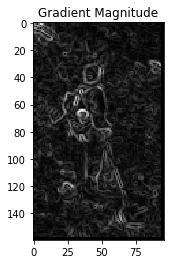

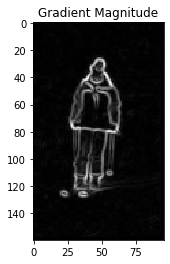

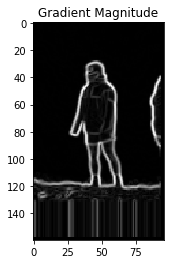

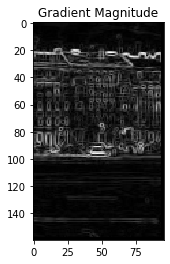

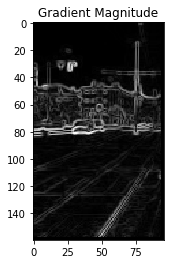

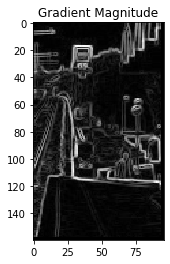

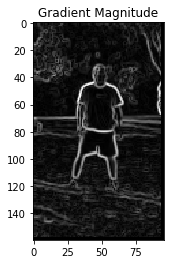

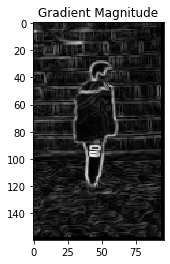

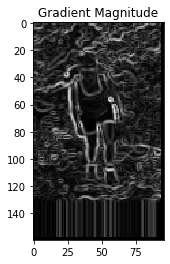

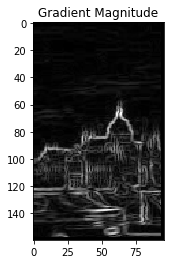

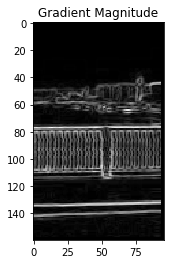

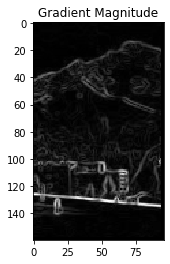

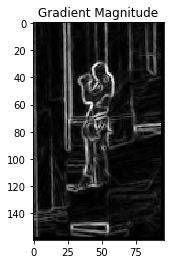

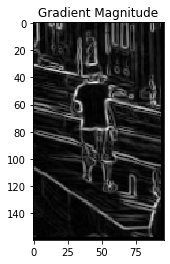

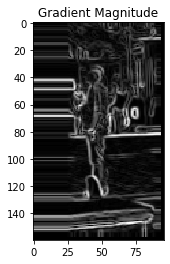

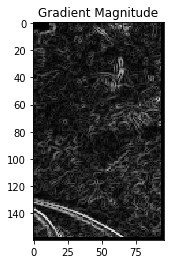

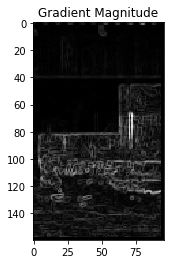

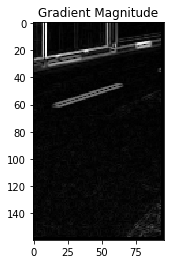

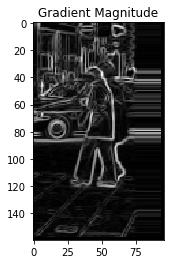

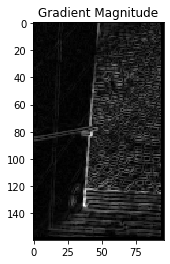

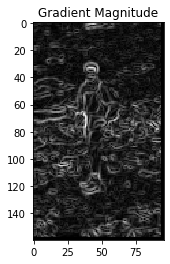

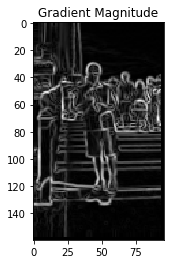

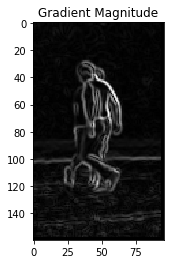

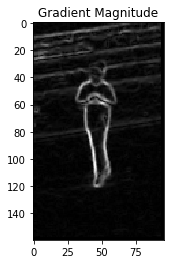

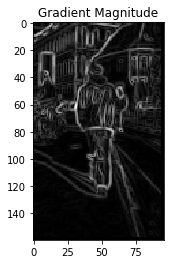

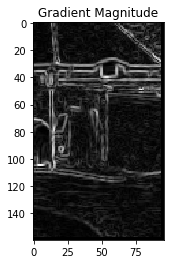

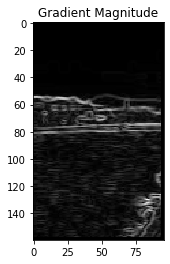

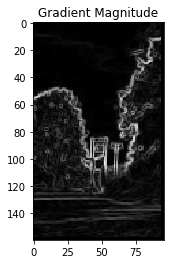

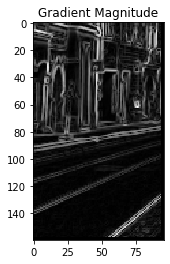

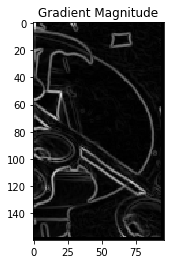

10
[[3.16069568e-01 5.63764614e-02 3.52057191e-03 ... 7.99315842e-02
  2.77492668e-02 3.39273419e-02]
 [2.72126329e-01 2.30029249e-01 1.05767523e-01 ... 7.07605864e-02
  1.55370121e-01 6.52204114e-02]
 [1.10892942e-01 3.80501986e-02 1.79996724e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [7.12882311e-05 2.33934474e-03 9.60416171e-03 ... 5.91756607e-03
  4.43822709e-02 2.82005918e-01]
 [1.51714843e-01 2.89992187e-02 1.14982226e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [5.96408390e-02 6.54876784e-02 1.41812700e-01 ... 6.33974318e-03
  2.39017307e-02 1.40685893e-01]] [[1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]] *
 *
[[3.16069568e-01 5.63764614e-02 3.52057191e-03 ... 1.00000000e+00
  5.00000000e+00 3.50000000e+01]
 [2.72126329e-01 2.30029249e-01 1.05767523e-01 ... 5.00000000e+00
  8.00000000e+00 4.80000000e+01]
 [1.10892942e-01 3.80501986e-02 1.79996724e-01 ... 0.00000000e+00
  0.000

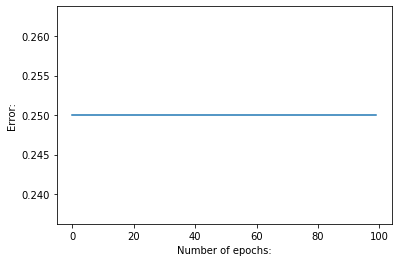

c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


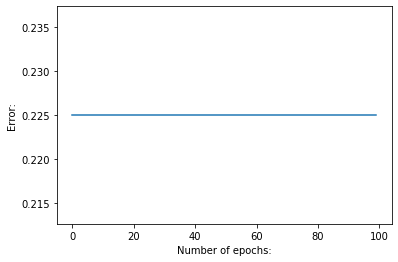

In [14]:
if __name__=="__main__":
    main()